In [7]:
# TensorFlow and tf.tferas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



## Loading and Pre-Processing the dataset

In [8]:

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()




In [9]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
IMG_SIZE = 224
BATCH_SIZE = 32

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

# Preprocess function to resize and normalize images
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image)
    return image, label
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_ds = (train_ds
            .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            .shuffle(buffer_size=50000)
            .batch(64)
            .prefetch(tf.data.AUTOTUNE))

test_ds = (test_ds
           .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
           .batch(64)
           .prefetch(tf.data.AUTOTUNE))


## Model building

In [10]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [11]:
x=base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



: 

In [ ]:
model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,)

Epoch 1/10


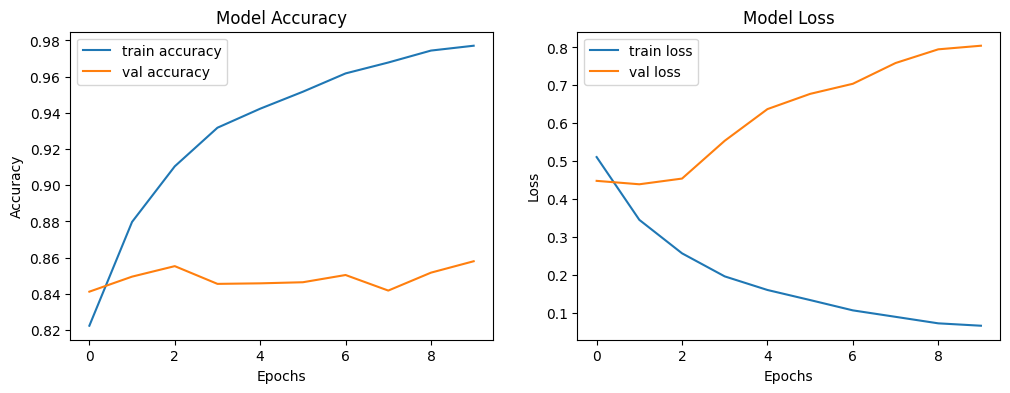

In [ ]:
# plot accruacy and loss
history = model.history.history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='train accuracy')
plt.plot(history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='train loss')
plt.plot(history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_ds)

157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 186ms/step - accuracy: 0.8547 - loss: 0.8144


[0.8044675588607788, 0.8579999804496765]

In [ ]:
test_ds


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>